In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from datetime import datetime
import math
import warnings
warnings.filterwarnings('ignore')
import pickle

In [5]:
train= pd.read_csv('/content/train.csv (1).zip')
store= pd.read_csv('/content/stores.csv')
features= pd.read_csv('/content/features.csv (1).zip')

# Traning dataset

In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train.shape



(421570, 5)

In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


# store data set

In [9]:
store.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
store.shape


(45, 3)

In [11]:

store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [12]:
features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
features.shape

(8190, 12)

In [14]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [15]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [16]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [17]:
store.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


data **preprocessing**

In [18]:
train.isnull()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
421565,False,False,False,False,False
421566,False,False,False,False,False
421567,False,False,False,False,False
421568,False,False,False,False,False


In [19]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [20]:
store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [21]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [22]:
data=train.merge(features,how='left',indicator=True).merge(store,how='left')
print(data.shape)

(421570, 17)


In [23]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,both,B,118221


In [24]:
data2=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [25]:
data2.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
_merge          0
Type            0
Size            0
dtype: int64

In [26]:
data2

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,both,B,118221


In [27]:
data2.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000


In [28]:
data3=data2.loc[data2['Weekly_Sales']>=0]
data3.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000
mean,22.195477,44.242771,16030.329773,60.090474,3.360888,171.212152,7.960077,136749.569176
std,12.787213,30.507197,22728.500149,18.448260,0.458523,39.162280,1.863873,60992.688568
min,1.000000,1.000000,0.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2117.560000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7659.090000,62.090000,3.452000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20268.380000,74.280000,3.738000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000


In [29]:
data3.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,both,A,151315
224669,23,79,2010-02-05,35265.03,False,15.25,2.788,131.527903,5.892,both,B,114533
224660,23,78,2010-02-05,12.00,False,15.25,2.788,131.527903,5.892,both,B,114533
187907,20,5,2010-02-05,56536.02,False,25.92,2.784,204.247194,8.187,both,A,203742
152265,16,32,2010-02-05,3852.56,False,19.79,2.580,189.381697,7.039,both,B,57197
...,...,...,...,...,...,...,...,...,...,...,...,...
268838,28,13,2012-10-26,35417.45,False,65.95,4.301,131.193097,10.199,both,A,206302
157749,17,2,2012-10-26,43451.19,False,39.94,3.755,131.193097,5.527,both,B,93188
44379,5,34,2012-10-26,3200.56,False,71.70,3.506,224.037814,5.422,both,B,34875
81626,9,22,2012-10-26,5489.69,False,69.52,3.506,227.232807,4.954,both,B,125833


In [30]:
data4=data3.drop(['_merge'],axis=1)
data4.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
224669,23,79,2010-02-05,35265.03,False,15.25,2.788,131.527903,5.892,B,114533
224660,23,78,2010-02-05,12.00,False,15.25,2.788,131.527903,5.892,B,114533
187907,20,5,2010-02-05,56536.02,False,25.92,2.784,204.247194,8.187,A,203742
152265,16,32,2010-02-05,3852.56,False,19.79,2.580,189.381697,7.039,B,57197
...,...,...,...,...,...,...,...,...,...,...,...
268838,28,13,2012-10-26,35417.45,False,65.95,4.301,131.193097,10.199,A,206302
157749,17,2,2012-10-26,43451.19,False,39.94,3.755,131.193097,5.527,B,93188
44379,5,34,2012-10-26,3200.56,False,71.70,3.506,224.037814,5.422,B,34875
81626,9,22,2012-10-26,5489.69,False,69.52,3.506,227.232807,4.954,B,125833


<Axes: ylabel='Weekly_Sales'>

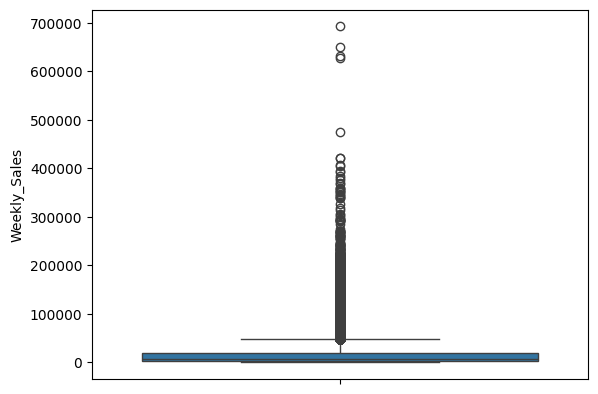

In [31]:
import seaborn as sns
sns.boxplot(data4['Weekly_Sales'])

In [32]:
q1=data4['Weekly_Sales'].quantile(0.25)
q3=data4['Weekly_Sales'].quantile(0.75)
iqr=q3-q1

In [33]:
q1,q3,iqr

(2117.56, 20268.38, 18150.82)

In [34]:
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound

(-25108.67, 47494.61)

<Axes: ylabel='Weekly_Sales'>

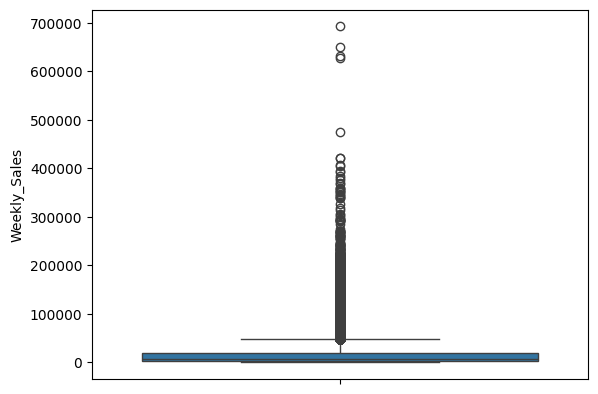

In [35]:
sns.boxplot(data4['Weekly_Sales'])

In [36]:
 data5= data4[(data4['Weekly_Sales'] >= lower_bound) & (data4['Weekly_Sales'] <= upper_bound)]
 print('before removing outliners',len(data4))
 print('after removing outliners',len(data5))
 print('total outliners',len(data4)-len(data5))

before removing outliners 420285
after removing outliners 384904
total outliners 35381


<Axes: ylabel='Weekly_Sales'>

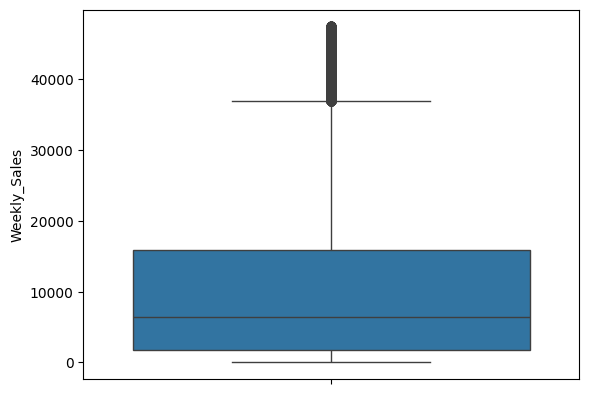

In [37]:
sns.boxplot(data5['Weekly_Sales'])

In [38]:
q1=data5['Weekly_Sales'].quantile(0.25)
q3=data5['Weekly_Sales'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(1791.6575, 15863.2875, 14071.630000000001)

In [39]:
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound

(-19315.7875, 36970.7325)

In [40]:
 data6= data5[(data5['Weekly_Sales'] >= lower_bound) & (data5['Weekly_Sales'] <= upper_bound)]
 print('before removing outliners',len(data5))
 print('after removing outliners',len(data6))
 print('total outliners',len(data5)-len(data6))

before removing outliners 384904
after removing outliners 367462
total outliners 17442


<Axes: ylabel='Weekly_Sales'>

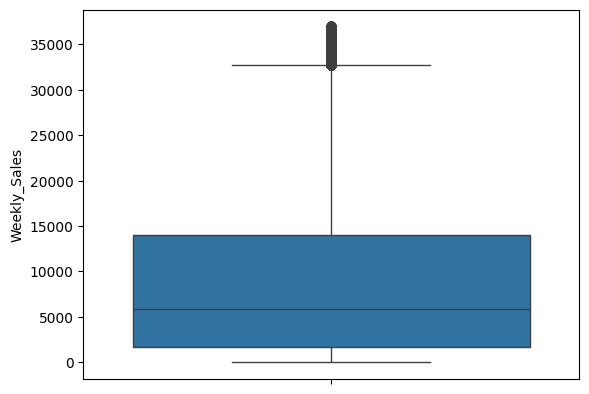

In [41]:
sns.boxplot(data6['Weekly_Sales'])

In [42]:
data6.shape

(367462, 11)

<Axes: ylabel='Fuel_Price'>

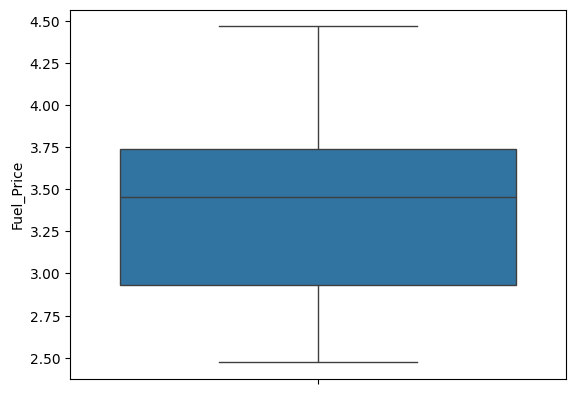

In [43]:
sns.boxplot(data6['Fuel_Price'])

<Axes: ylabel='CPI'>

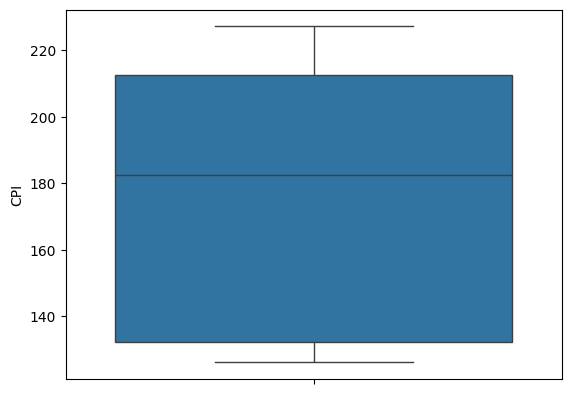

In [44]:
sns.boxplot(data6['CPI'])

<Axes: ylabel='Temperature'>

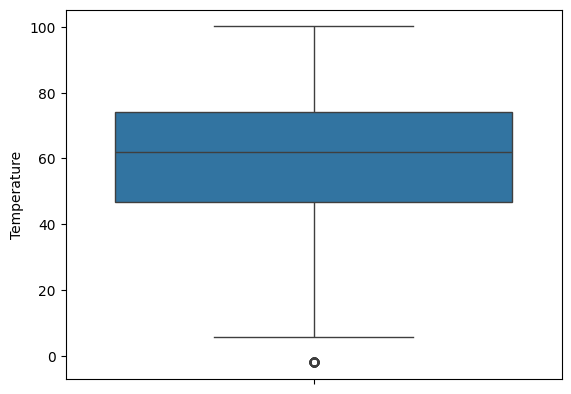

In [45]:
sns.boxplot(data6['Temperature'])

In [46]:
q1=data6['Temperature'].quantile(0.25)
q3=data6['Temperature'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(46.6, 74.22, 27.619999999999997)

In [47]:
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound

(5.170000000000009, 115.64999999999999)

In [48]:
 data7= data6[(data6['Temperature'] >= lower_bound) & (data6['Temperature'] <= upper_bound)]
 print('before removing outliners',len(data6))
 print('after removing outliners',len(data7))
 print('total outliners',len(data6)-len(data7))

before removing outliners 367462
after removing outliners 367396
total outliners 66


<Axes: ylabel='Temperature'>

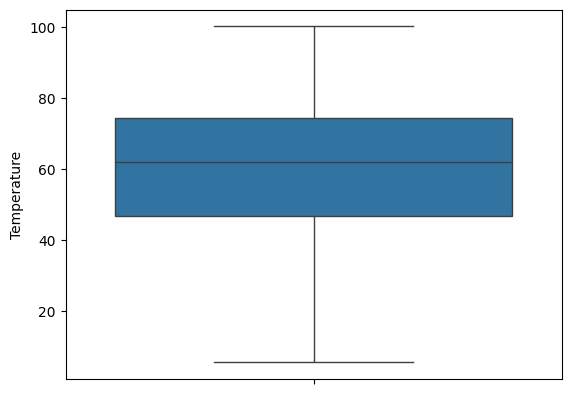

In [49]:
sns.boxplot(data7['Temperature'])

<Axes: ylabel='Unemployment'>

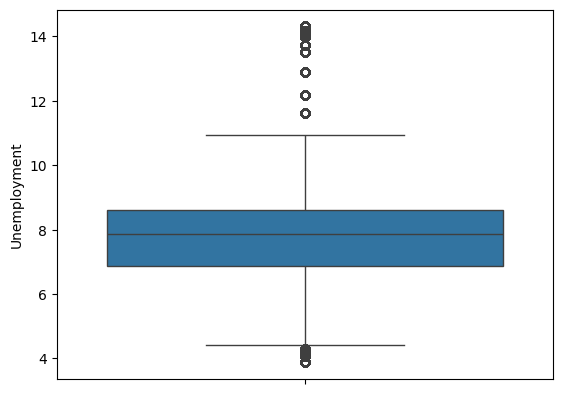

In [50]:
sns.boxplot(data7['Unemployment'])

In [51]:
q1=data7['Unemployment'].quantile(0.25)
q3=data7['Unemployment'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(6.885, 8.595, 1.7100000000000009)

In [52]:
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound

(4.3199999999999985, 11.160000000000002)

In [53]:
 data8= data7[(data7['Unemployment'] >= lower_bound) & (data7['Unemployment'] <= upper_bound)]
 print('before removing outliners',len(data7))
 print('after removing outliners',len(data8))
 print('total outliners',len(data7)-len(data8))

before removing outliners 367396
after removing outliners 339711
total outliners 27685


<Axes: ylabel='Unemployment'>

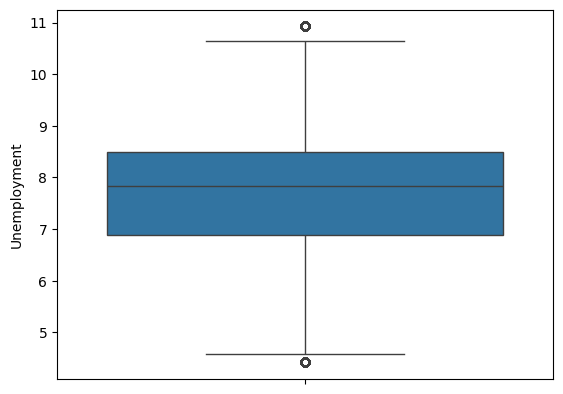

In [54]:
sns.boxplot(data8['Unemployment'])

In [55]:
q1=data8['Unemployment'].quantile(0.25)
q3=data8['Unemployment'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(6.885, 8.494, 1.609)

In [56]:
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound

(4.4715, 10.907499999999999)

In [57]:
 data9= data8[(data8['Unemployment'] >= lower_bound) & (data8['Unemployment'] <= upper_bound)]
 print('before removing outliners',len(data8))
 print('after removing outliners',len(data9))
 print('total outliners',len(data8)-len(data9))

before removing outliners 339711
after removing outliners 335945
total outliners 3766


<Axes: ylabel='Unemployment'>

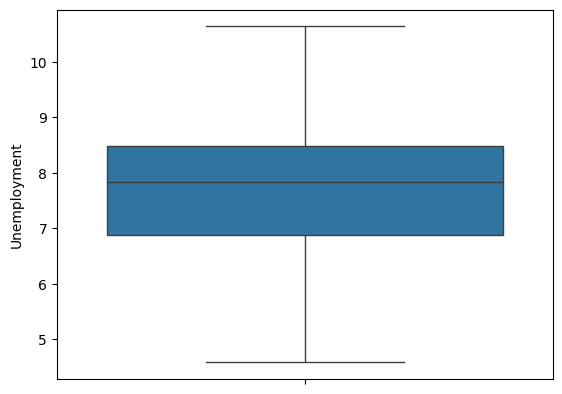

In [58]:
sns.boxplot(data9['Unemployment'])

<Axes: ylabel='Size'>

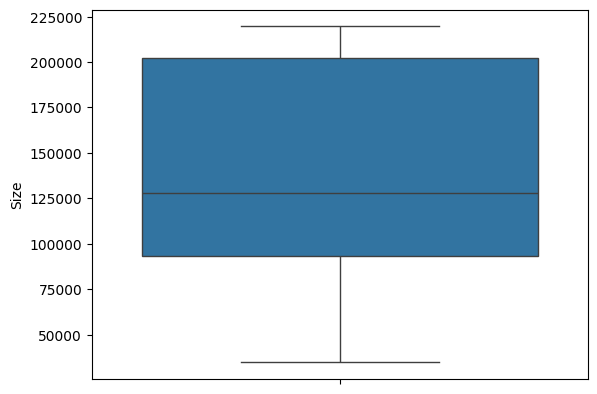

In [59]:
sns.boxplot(data9['Size'])

<Axes: ylabel='Store'>

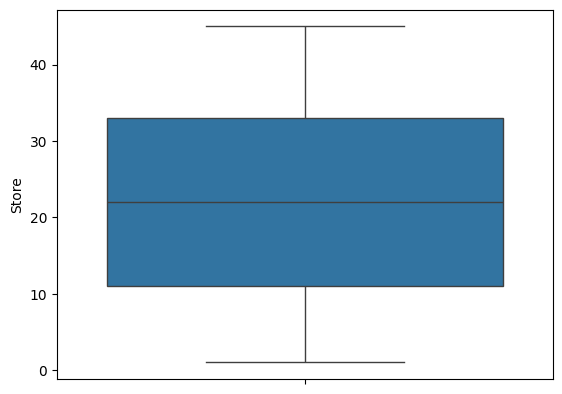

In [60]:
sns.boxplot(data9['Store'])

<Axes: ylabel='Dept'>

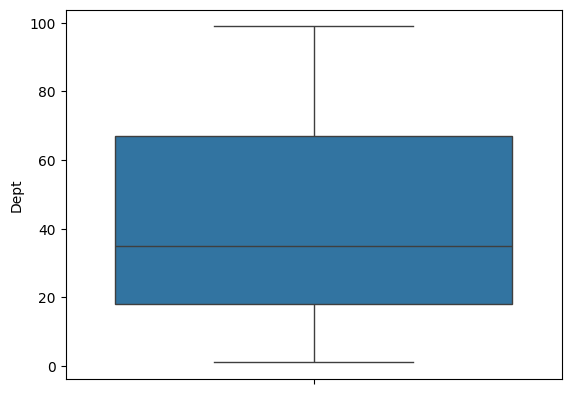

In [61]:
sns.boxplot(data9['Dept'])

<Axes: ylabel='Date'>

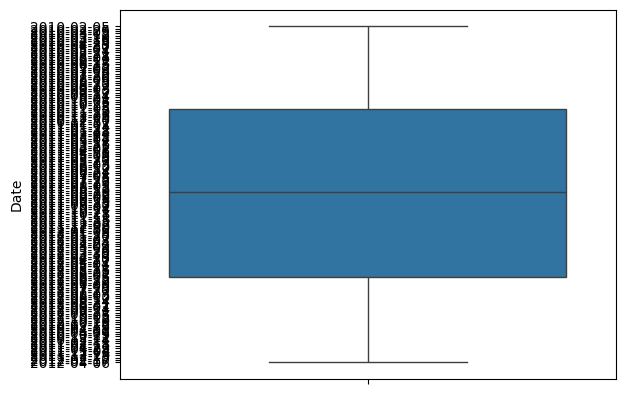

In [62]:
sns.boxplot(data9['Date'])

<Axes: ylabel='Type'>

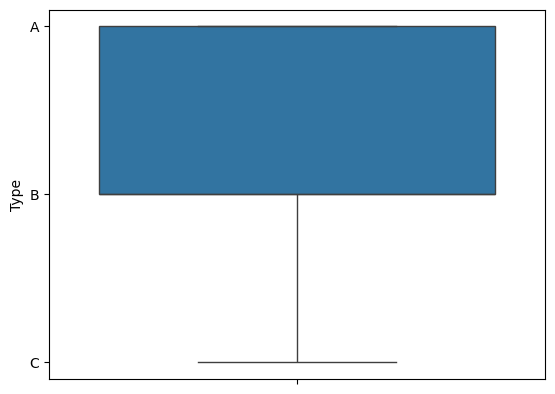

In [63]:
sns.boxplot(data9['Type'])

In [64]:
data9.shape

(335945, 11)

In [65]:
data9['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

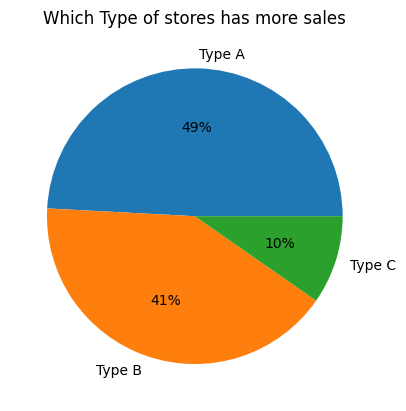

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Creating dataset
stores = ['Type A','Type B','Type C']

df = data9['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(df, labels = stores,autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

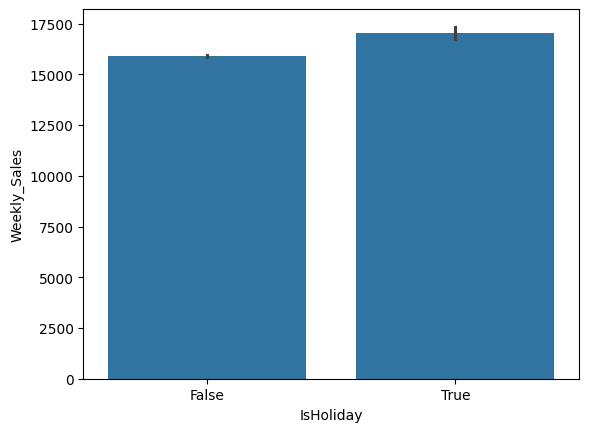

In [67]:
holiday=train['Weekly_Sales'].loc[train['IsHoliday']==True]
not_holiday=train['Weekly_Sales'].loc[train['IsHoliday']==False]
sns.barplot(x='IsHoliday',y='Weekly_Sales',data=train)

# Handling categorical values


In [68]:
if 'Type' in data9.columns:
    data9 = pd.get_dummies(data9, columns=['Type'])
else:
    print("Column 'Type' does not exist. It might have  been already one-hot encoded.")

In [69]:
data9['Date']=pd.to_datetime(data9['Date'])


In [70]:
data9['Year']=data9['Date'].dt.year
data9['Month']=data9['Date'].dt.month

In [71]:
data9[['Date','Month','Year']].head()

,Date,Month,Year
0,2010-02-05,2,2010
3,2010-02-26,2,2010
4,2010-03-05,3,2010
5,2010-03-12,3,2010
6,2010-03-19,3,2010


In [72]:
data9['Dayofweek_name']=data9['Date'].dt.day_name()
data9[['Date','Dayofweek_name']].head()

,Date,Dayofweek_name
0,2010-02-05,Friday
3,2010-02-26,Friday
4,2010-03-05,Friday
5,2010-03-12,Friday
6,2010-03-19,Friday


In [73]:
data9['is_weekend']=np.where(data9['Dayofweek_name'].isin(['Saturday','Sunday']),1,0)

In [74]:
data9['IsHoliday']=data9['IsHoliday'].astype(int)
del data9['Dayofweek_name']

In [75]:
data9['Type_A']=data9['Type_A'].astype(int)
data9['Type_B']=data9['Type_B'].astype(int)
data9['Type_C']=data9['Type_C'].astype(int)

In [76]:
print(data9.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50          0        42.31       2.572   
3      1     1 2010-02-26      19403.54          0        46.63       2.561   
4      1     1 2010-03-05      21827.90          0        46.50       2.625   
5      1     1 2010-03-12      21043.39          0        57.79       2.667   
6      1     1 2010-03-19      22136.64          0        54.58       2.720   

          CPI  Unemployment    Size  Type_A  Type_B  Type_C  Year  Month  \
0  211.096358         8.106  151315       1       0       0  2010      2   
3  211.319643         8.106  151315       1       0       0  2010      2   
4  211.350143         8.106  151315       1       0       0  2010      3   
5  211.380643         8.106  151315       1       0       0  2010      3   
6  211.215635         8.106  151315       1       0       0  2010      3   

   is_weekend  
0           0  
3           0  
4           0  
5   

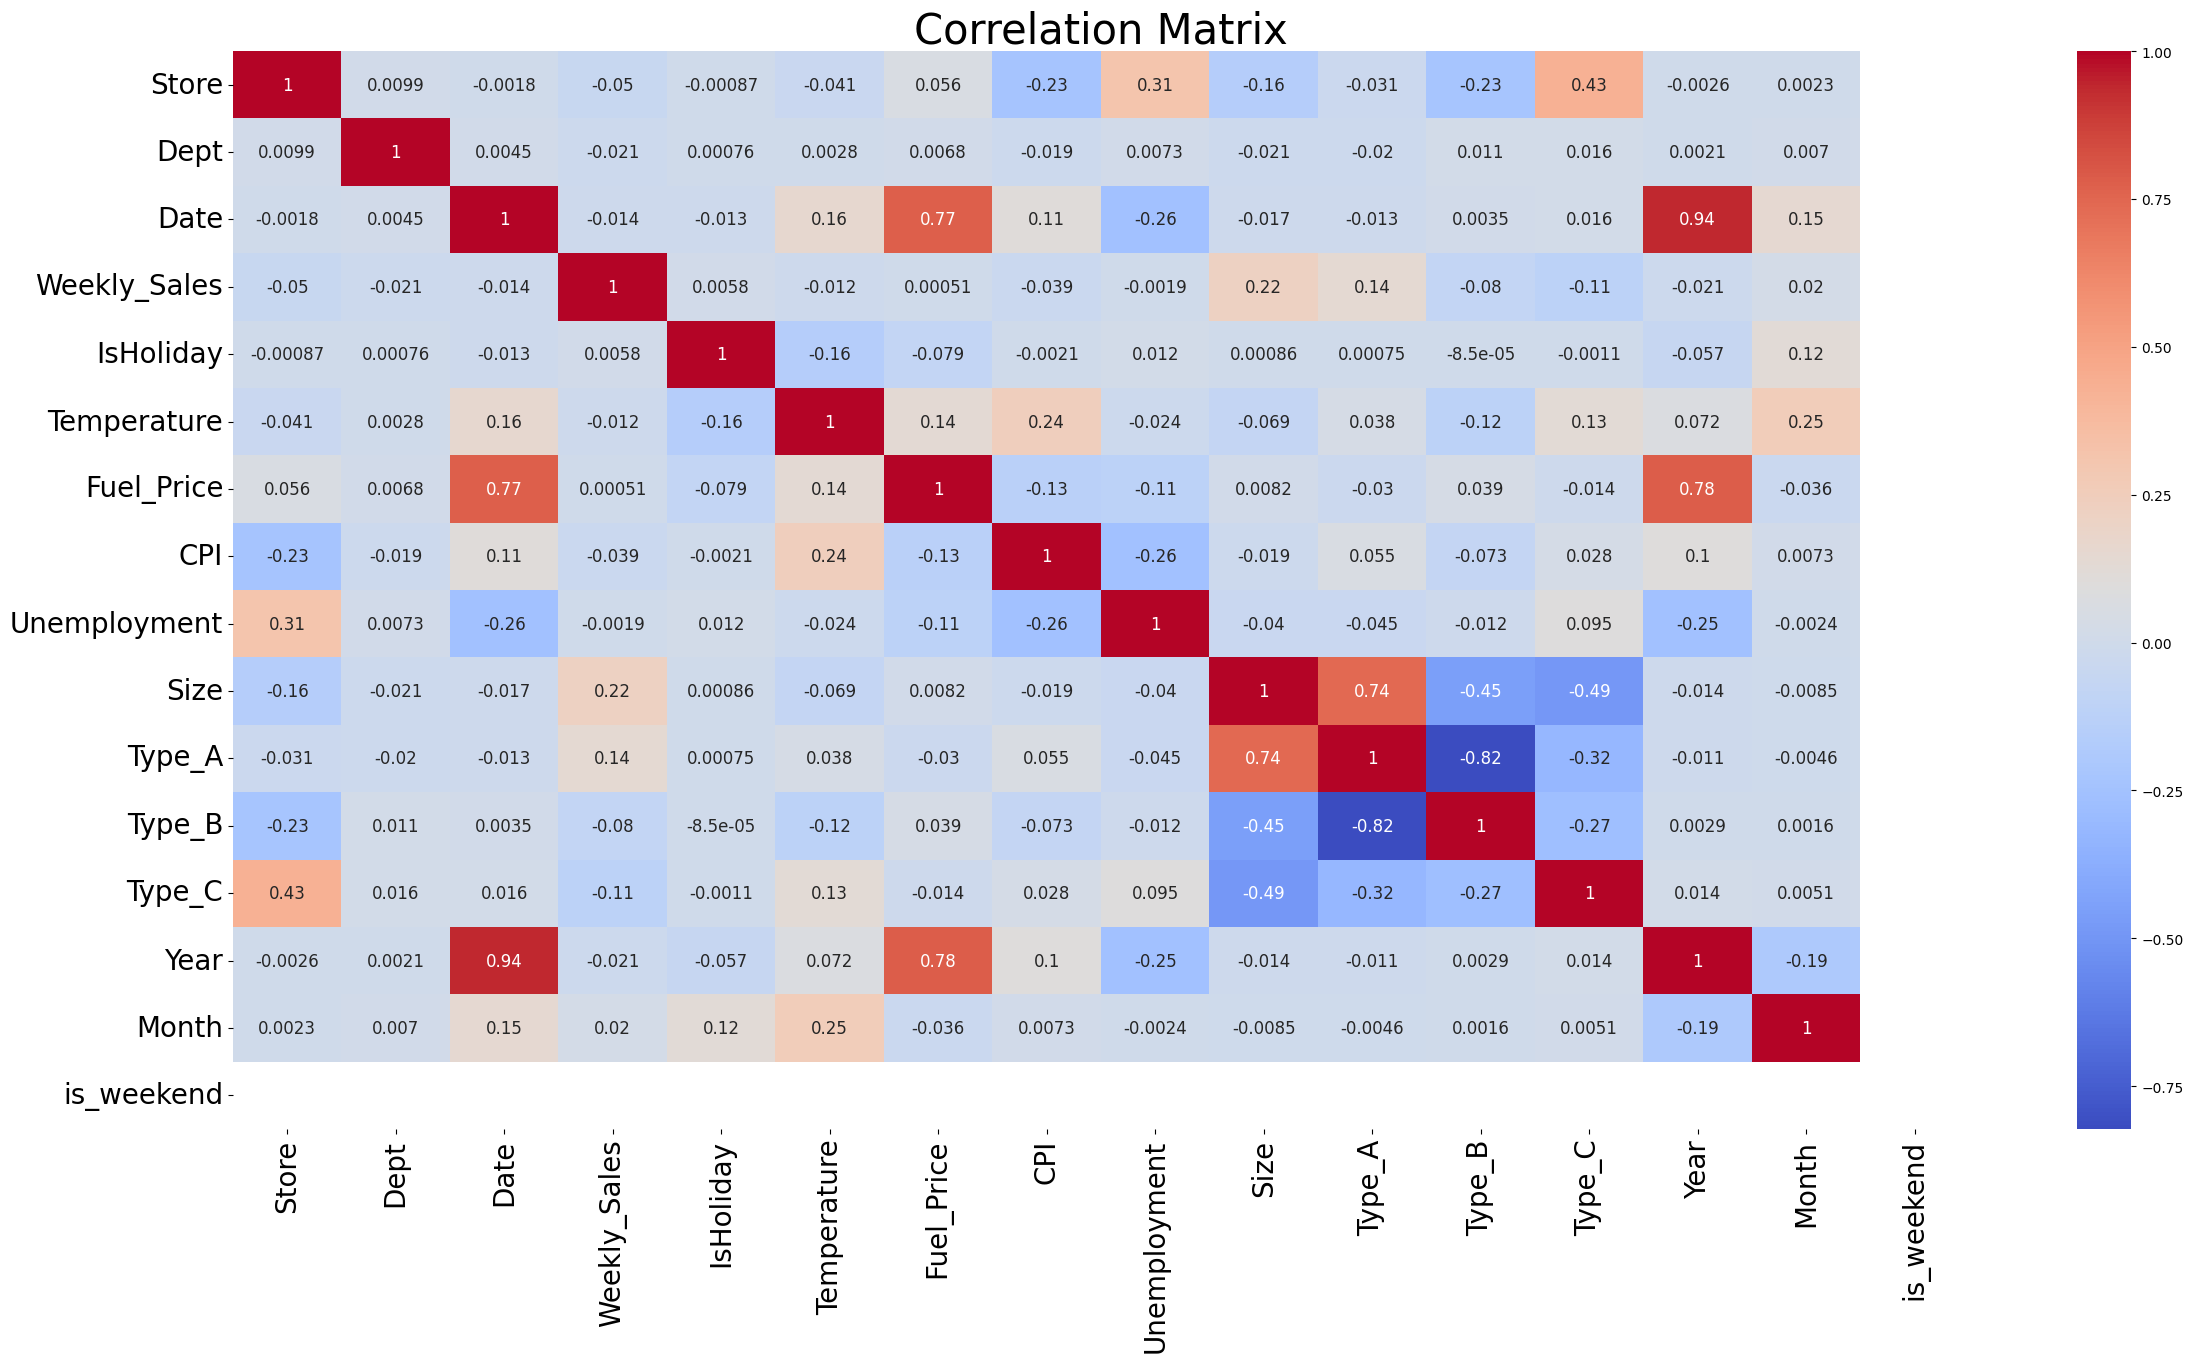

In [77]:
plt.figure(figsize=(28,14))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(data9.corr(),cmap='coolwarm',annot=True,annot_kws={'size':12})
plt.title('Correlation Matrix',fontsize=30)
plt.show()



In [78]:
data9

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Type_A,Type_B,Type_C,Year,Month,is_weekend
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,151315,1,0,0,2010,2,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,151315,1,0,0,2010,2,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,151315,1,0,0,2010,3,0
5,1,1,2010-03-12,21043.39,0,57.79,2.667,211.380643,8.106,151315,1,0,0,2010,3,0
6,1,1,2010-03-19,22136.64,0,54.58,2.720,211.215635,8.106,151315,1,0,0,2010,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,192.013558,8.684,118221,0,1,0,2012,9,0
421566,45,98,2012-10-05,628.10,0,64.89,3.985,192.170412,8.667,118221,0,1,0,2012,10,0
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,192.327265,8.667,118221,0,1,0,2012,10,0
421568,45,98,2012-10-19,760.01,0,56.47,3.969,192.330854,8.667,118221,0,1,0,2012,10,0


In [79]:
data9.to_csv('merged_data.csv',index=False)

splitting the data into train and testing


In [80]:
X=data9.loc[:,data9.columns!='Weekly_Sales']
Y=data9.loc[:,data9.columns=='Weekly_Sales']
X=X[["Store","Dept","Month","Year","IsHoliday","Type_B","Type_C","Temperature","CPI","Size","Unemployment","is_weekend"]]
Y=Y.values.reshape(-1,1)
print(X.head())

   Store  Dept  Month  Year  IsHoliday  Type_B  Type_C  Temperature  \
0      1     1      2  2010          0       0       0        42.31   
3      1     1      2  2010          0       0       0        46.63   
4      1     1      3  2010          0       0       0        46.50   
5      1     1      3  2010          0       0       0        57.79   
6      1     1      3  2010          0       0       0        54.58   

          CPI    Size  Unemployment  is_weekend  
0  211.096358  151315         8.106           0  
3  211.319643  151315         8.106           0  
4  211.350143  151315         8.106           0  
5  211.380643  151315         8.106           0  
6  211.215635  151315         8.106           0  


In [81]:
print(Y)

[[24924.5 ]
 [19403.54]
 [21827.9 ]
 ...
 [ 1061.02]
 [  760.01]
 [ 1076.8 ]]


In [82]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# **MODELLING**

# random forest

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=30,min_samples_split=5,min_samples_leaf=5)
rf.fit(X_train,Y_train.ravel())
print('Testing Accuracy:',rf.score(X_test,Y_test.ravel())*100,'%')
Y_pred=rf.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rms=mean_squared_error(Y_test,Y_pred,squared=False)
print('RMSE:',rms)
print('MAE:',mean_absolute_error(Y_test,Y_pred))
print("Training Accuracy:",rf.score(X_train,Y_train.ravel())*100,'%')

Testing Accuracy: 95.91386791573326 %
RMSE: 1874.2979744790634
MAE: 995.7443842730455
Training Accuracy: 97.65603535894257 %


# DECISION TREE

In [84]:
#importing and building the Decision tree model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)
print('Testing Accuracy:',dt.score(X_test,Y_test.ravel())*100,'%')
from sklearn import metrics
rms=mean_squared_error(Y_test,Y_pred,squared=False)
print('RMSE:',rms)
print('MAE:',mean_absolute_error(Y_test,Y_pred))
print("Training Accuracy:",rf.score(X_train,Y_train.ravel())*100,'%')

Testing Accuracy: 93.44439739745214 %
RMSE: 2374.0438960231972
MAE: 1230.2517804997842
Training Accuracy: 97.65603535894257 %


# Xgboost

In [85]:
#importing and building the XGBoost
import xgboost as xgb
xg_reg=xgb.XGBRegressor(objective='reg:squarederror',nthread=4,n_estimators=500,max_depth=4,learning_rate=0.5)
xg_reg.fit(X_train,Y_train)
pred = xg_reg.predict(X_test)
Y_pred=xg_reg.predict(X_test)
print('Testing Accuracy:',dt.score(X_test,Y_test.ravel())*100,'%')
rms=mean_squared_error(Y_test,pred,squared=False)
print('RMSE:',rms)
print('MAE:',mean_absolute_error(Y_test,pred))
print("Training Accuracy:",rf.score(X_train,Y_train.ravel())*100,'%')

Testing Accuracy: 93.44439739745214 %
RMSE: 2495.706679534887
MAE: 1667.5961689900203
Training Accuracy: 97.65603535894257 %


# ARIMA

In [86]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00


In [87]:
import pmdarima
from pmdarima import auto_arima

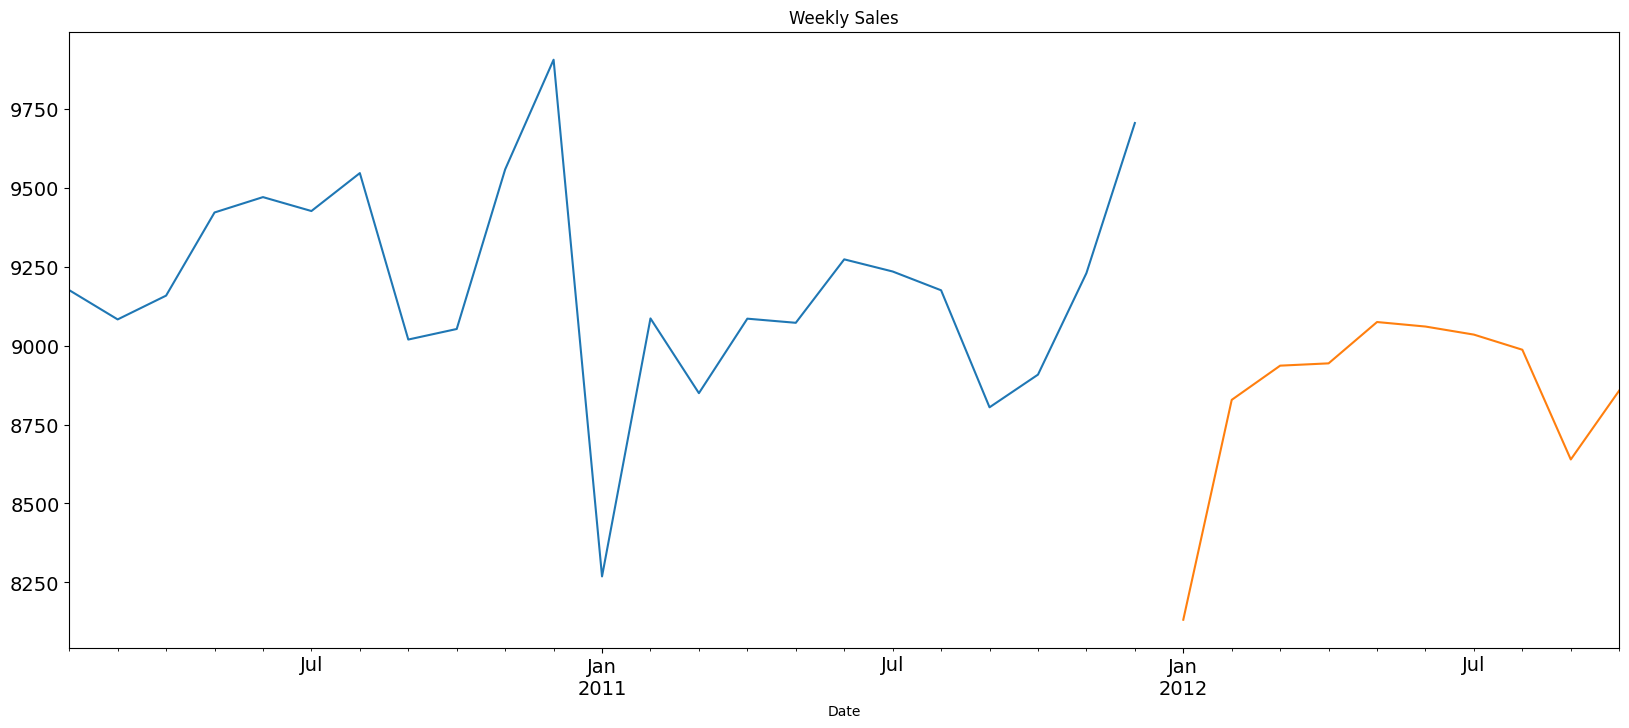

In [88]:
data9.Date=pd.to_datetime(data9.Date,format='%Y-%m-%d')
data9.index=data9.Date
data9=data9.drop('Date',axis=1)
data9=data9.resample('MS').mean()
train_data=data9[:int(0.7*(len(data9)))]
test_data=data9[int(0.7*(len(data9))):]
train_data=train_data['Weekly_Sales']
test_data=test_data['Weekly_Sales']
train_data.plot(figsize=(20,8),title='Weekly Sales',fontsize=14)
test_data.plot(figsize=(20,8),title='Weekly Sales',fontsize=14)
plt.show()

In [89]:
model_auto_arima = auto_arima(train_data, trace=True, suppress_warnings=True, error_action='ignore')
model_auto_arima = auto_arima(train_data, trace=True, start_p=0, start_q=0, start_P=0, start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True, stepwise=False, suppress_warnings=True, D=1, max_D=1)
model_auto_arima.fit

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=344.084, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=336.202, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=338.222, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=338.198, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=487.120, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=340.342, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.577 seconds
 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=336.202, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=338.198, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=339.793, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=341.251, Time=0.14 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=342.642, Time=0.21 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=338.222, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : A

<bound method ARIMA.fit of ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)>

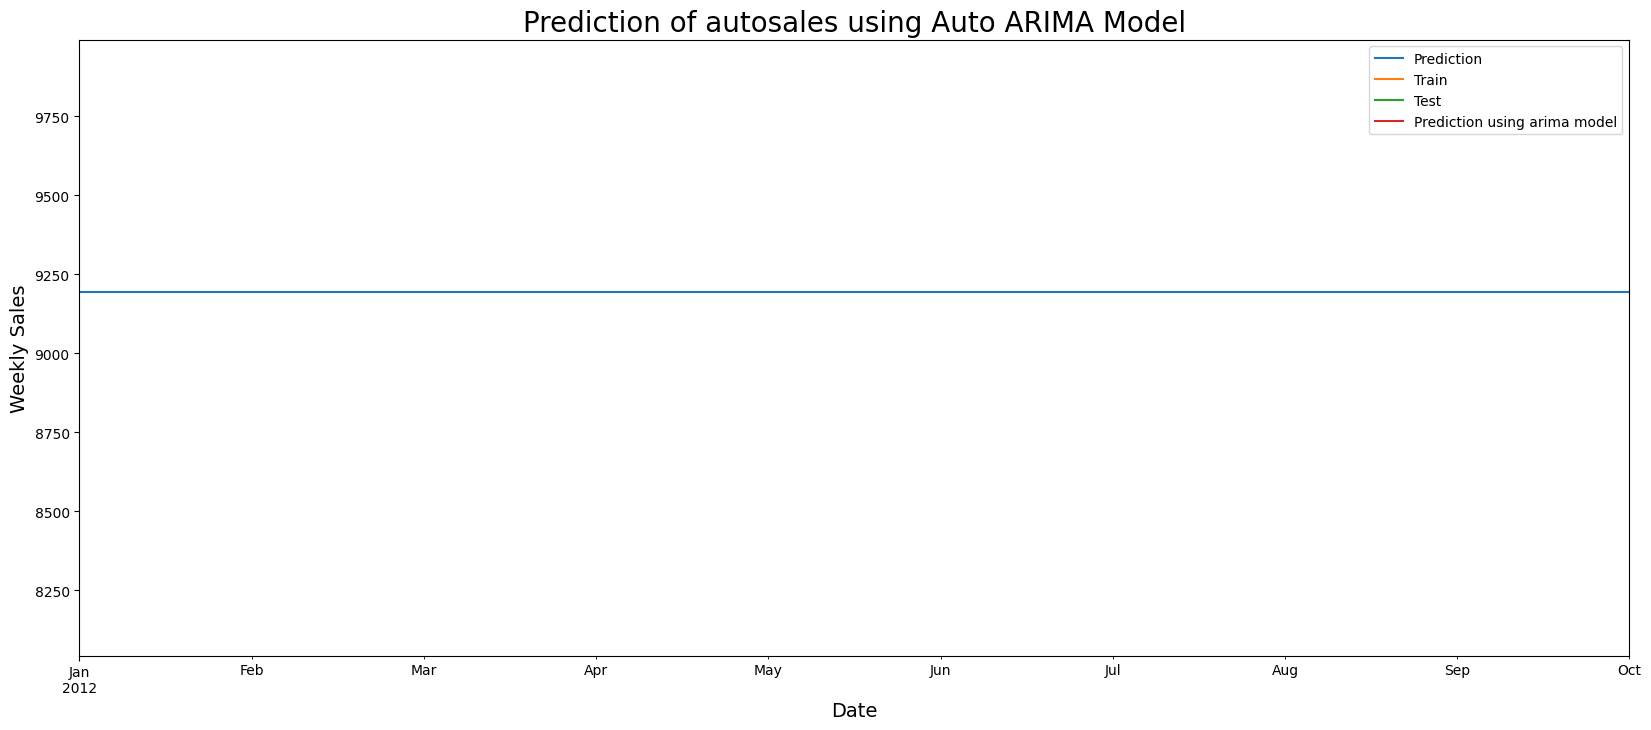

In [90]:
forcast=model_auto_arima.predict(n_periods=len(test_data))
forcast=pd.DataFrame(forcast,index=test_data.index,columns=['Prediction'])
forcast.plot(figsize=(20,8))
plt.title('Prediction of autosales using Auto ARIMA Model',fontsize=20)
plt.plot(train_data,label='Train')
plt.plot(test_data,label='Test')
plt.plot(forcast,label='Prediction using arima model')
plt.legend(loc='best')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Weekly Sales',fontsize=14)
plt.show()


In [91]:
print('mean_squared_error(MSE) of ARIMA model:',mean_squared_error(test_data,forcast))
print('mean_absolute_error(MAE) of ARIMA model:',mean_absolute_error(test_data,forcast))
print('root_mean_squared_error(RMSE) of ARIMA model:',math.sqrt(mean_squared_error(test_data,forcast)))

mean_squared_error(MSE) of ARIMA model: 192435.23031259677
mean_absolute_error(MAE) of ARIMA model: 346.47571328610394
root_mean_squared_error(RMSE) of ARIMA model: 438.6744012506278


# comparing the models

In [92]:
from prettytable import PrettyTable
tb=PrettyTable()
tb.field_names=['Model','training accuracy','testing accuracy','MAE','RMSE']
tb.add_row(['Random Forest', 95.91896847844589,97.65650118443212,995,1873])
tb.add_row(['Decision Tree',97.65,93.44,1230,2374])
tb.add_row(['xgboost',97.6565,93.44,1667,2495])
tb.add_row(['ARIMA','','',346,438])
print(tb)

+---------------+-------------------+-------------------+------+------+
|     Model     | training accuracy |  testing accuracy | MAE  | RMSE |
+---------------+-------------------+-------------------+------+------+
| Random Forest | 95.91896847844589 | 97.65650118443212 | 995  | 1873 |
| Decision Tree |       97.65       |       93.44       | 1230 | 2374 |
|    xgboost    |      97.6565      |       93.44       | 1667 | 2495 |
|     ARIMA     |                   |                   | 346  | 438  |
+---------------+-------------------+-------------------+------+------+


In [ ]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(n_estimators=58,max_depth=28,min_samples_split=3,min_samples_leaf=1)
rf.fit(X_train,Y_train.ravel())
Y_pred=rf.predict(X_test)
cv=cross_val_score(rf,X,Y.ravel(),cv=6)
np.mean(cv)


In [95]:
import pickle
pickle.dump(rf,open('rf1_model.pkl','wb'))

In [96]:
model_loaded=pickle.load(open('rf1_model.pkl','rb'))

In [97]:
model_loaded.predict(X_test)

array([34423.42684195,  4059.27991379,  2757.26021346, ...,
         723.41362767, 20462.98562726, 23783.62847989])